In [7]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import confusion_matrix, classification_report, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np
from torch.utils.tensorboard import SummaryWriter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import datasets
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

50
123.54489857404799
150
120.82007170013564
250
120.25259515211866
350
120.04022695922873
450
120.35945727122414


Text(0.5, 1.0, 'RMSE vs Epochs')

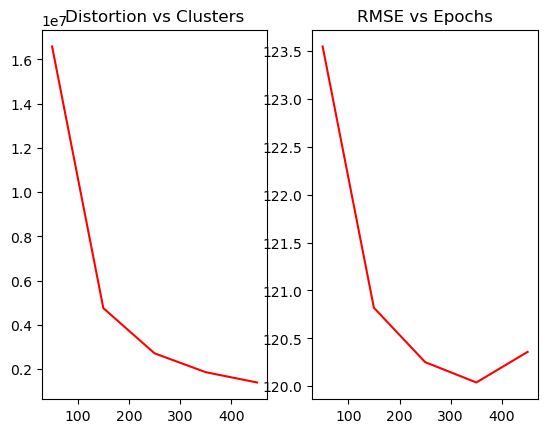

In [4]:
raw_data = house_data = pd.read_csv('nyc_2019_data.csv', low_memory=False)

raw_data = raw_data[['availability_365', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'minimum_nights', 'number_of_reviews']]
neighbourhood = pd.get_dummies(raw_data[['neighbourhood_group', 'neighbourhood', 'room_type']])
raw_data = raw_data.drop(columns=['neighbourhood_group', 'neighbourhood', 'room_type'])
raw_data = pd.concat([raw_data, neighbourhood],axis=1)

data_train, data_test = train_test_split(raw_data, test_size=0.2, random_state=4)
data_train_x = data_train.to_numpy()[:, 1:]
data_train_y = data_train.to_numpy()[:, 0]
data_test_x = data_test.to_numpy()[:, 1:]
data_test_y = data_test.to_numpy()[:, 0]

distortion_list = []
mse_list = []
num_c_list = []
for num_c in range(50, 500, 100):
    kmeans = KMeans(n_clusters = num_c, random_state=4)
    kmeans.fit(data_train_x)
    availability_per_cluster = np.zeros(num_c)
    for i in range(0, num_c):
        availability_per_cluster[i] = np.average(data_train_y[np.argwhere(kmeans.labels_ == i)])

    pred_clusters = kmeans.predict(data_test_x)
    pred_availability = availability_per_cluster[pred_clusters]
    # print("error in availability " + str(num_c) + " clusters")
    error = np.sqrt((np.sum(np.square((pred_availability - data_test_y))) / data_test_x.shape[0]))

    distortion_list.append(kmeans.inertia_)
    mse_list.append(error)
    num_c_list.append(num_c)
    print(num_c)
    print(str(error))

figure, axis = plt.subplots(1, 2)
axis[0].plot(num_c_list, distortion_list, color='red')
axis[0].set_title('Distortion vs Clusters')
axis[1].plot(num_c_list, mse_list, color='red')
axis[1].set_title('RMSE vs Clusters')


# data_train = data_train.to_numpy()
# data_test = data_test.to_numpy()
# print(data_train.shape)
# print(data_test.shape)

# kmeans = KMeans(n_clusters = 5)
# kmeans.fit(data_train)

# pred_clusters = kmeans.predict(data_test)
# pred_availability = kmeans.cluster_centers_[pred_clusters, 0]
# print(pred_availability.shape)
# print(type(data_test))
# print(data_test[:, 0].shape)
# print("error")
# print(np.sqrt((np.sum(np.square((pred_availability - data_test[:, 0]))) / data_test.shape[0])))

# labels = kmeans.labels_
# print(metrics.silhouette_score(data_train, labels, metric='euclidean'))

# distortions = []
# K = range(1,16)
# for k in K:
#     kmeans = KMeans(n_clusters = k)
#     kmeans.fit(data_train)
#     distortions.append(kmeans.inertia_)

# plt.figure(figsize=(16,8))
# plt.plot(K, distortions, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Distortion')
# plt.title('The Elbow Method showing the optimal k')
# plt.show()

# kmeans = KMeans(n_clusters = 8)
# kmeans.fit(data_train)
# labels = kmeans.labels_
# print(metrics.silhouette_score(data_train, labels, metric='euclidean'))

# u_labels = np.unique(labels)
 
# #plotting the results:
# df = pca.fit_transform(data_train)
# for i in u_labels:
#     plt.scatter(df[labels == i , 0] , df[labels == i , 1] , label = i)
# plt.legend()
# plt.show()

# {i: raw_data[np.where(pred_clusters == i)] for i in range(kmeans.n_clusters)}

50
129.25611935353882
150
127.60991746519224
250
126.56809002613221
350
122.68340981736111
450
120.8461516775822


Text(0.5, 1.0, 'RMSE vs Epochs')

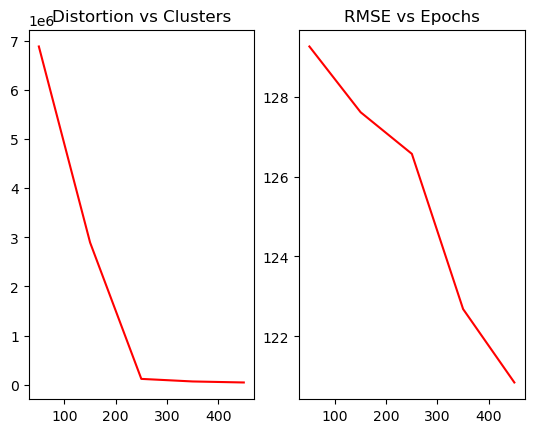

In [5]:
# kmeans with standard scaler
raw_data = house_data = pd.read_csv('nyc_2019_data.csv', low_memory=False)

raw_data = raw_data[['availability_365', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'minimum_nights', 'number_of_reviews']]
neighbourhood = pd.get_dummies(raw_data[['neighbourhood_group', 'neighbourhood', 'room_type']])
raw_data = raw_data.drop(columns=['neighbourhood_group', 'neighbourhood', 'room_type'])
raw_data = pd.concat([raw_data, neighbourhood],axis=1)

data_train, data_test = train_test_split(raw_data, test_size=0.2, random_state=4)

sc = StandardScaler()

data_train_x = data_train.to_numpy()[:, 1:]
data_train_x = sc.fit_transform(data_train_x)
data_train_y = data_train.to_numpy()[:, 0]
data_test_x = data_test.to_numpy()[:, 1:]
data_test_x = sc.transform(data_test_x)
data_test_y = data_test.to_numpy()[:, 0]

distortion_list = []
mse_list = []
num_c_list = []
for num_c in range(50, 500, 100):
    kmeans = KMeans(n_clusters = num_c, random_state=4)
    kmeans.fit(data_train_x)
    availability_per_cluster = np.zeros(num_c)
    for i in range(0, num_c):
        availability_per_cluster[i] = np.average(data_train_y[np.argwhere(kmeans.labels_ == i)])

    pred_clusters = kmeans.predict(data_test_x)
    pred_availability = availability_per_cluster[pred_clusters]
    # print("error in availability " + str(num_c) + " clusters")
    error = np.sqrt((np.sum(np.square((pred_availability - data_test_y))) / data_test_x.shape[0]))

    distortion_list.append(kmeans.inertia_)
    mse_list.append(error)
    num_c_list.append(num_c)
    print(num_c)
    print(str(error))

figure, axis = plt.subplots(1, 2)
axis[0].plot(num_c_list, distortion_list, color='red')
axis[0].set_title('Distortion vs Clusters')
axis[1].plot(num_c_list, mse_list, color='red')
axis[1].set_title('RMSE vs Clusters')

50
129.23473785296193
150
127.8148615360315
250
127.0469728642982
350
123.78109345926423
450
122.43317293095997


Text(0.5, 1.0, 'RMSE vs Components')

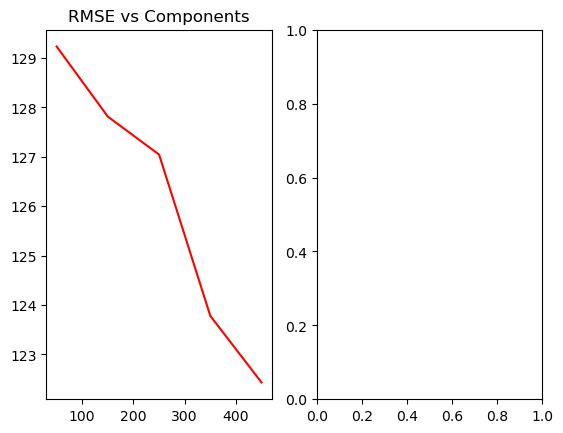

In [9]:
# gmmm with standard scaler
raw_data = house_data = pd.read_csv('nyc_2019_data.csv', low_memory=False)

raw_data = raw_data[['availability_365', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'minimum_nights', 'number_of_reviews']]
neighbourhood = pd.get_dummies(raw_data[['neighbourhood_group', 'neighbourhood', 'room_type']])
raw_data = raw_data.drop(columns=['neighbourhood_group', 'neighbourhood', 'room_type'])
raw_data = pd.concat([raw_data, neighbourhood],axis=1)

data_train, data_test = train_test_split(raw_data, test_size=0.2, random_state=4)

sc = StandardScaler()

data_train_x = data_train.to_numpy()[:, 1:]
data_train_x = sc.fit_transform(data_train_x)
data_train_y = data_train.to_numpy()[:, 0]
data_test_x = data_test.to_numpy()[:, 1:]
data_test_x = sc.transform(data_test_x)
data_test_y = data_test.to_numpy()[:, 0]

mse_list = []
num_c_list = []
for num_c in range(50, 500, 100):
    gmm = GaussianMixture(n_components = num_c, random_state=4)
    gmm.fit(data_train_x)
    availability_per_comp = np.zeros(num_c)
    prob_train = gmm.predict_proba(data_train_x)
    pred_train = np.argmax(prob_train, axis=1)
    for i in range(0, num_c):
        availability_per_comp[i] = np.average(data_train_y[np.argwhere(pred_train == i)])
    availability_per_comp = availability_per_comp.reshape((1, -1))
    pred_comp = gmm.predict_proba(data_test_x)
    pred_availability = np.sum(availability_per_comp * pred_comp, axis=1)
    # print("error in availability " + str(num_c) + " clusters")
    error = np.sqrt((np.sum(np.square((pred_availability - data_test_y))) / data_test_x.shape[0]))

    mse_list.append(error)
    num_c_list.append(num_c)
    print(num_c)
    print(str(error))

figure, axis = plt.subplots(1, 2)
axis[0].plot(num_c_list, mse_list, color='red')
axis[0].set_title('RMSE vs Components')

50
129.23473785296193
250
127.04871585931582
450
122.37400052255951


Text(0.5, 1.0, 'RMSE vs Components')

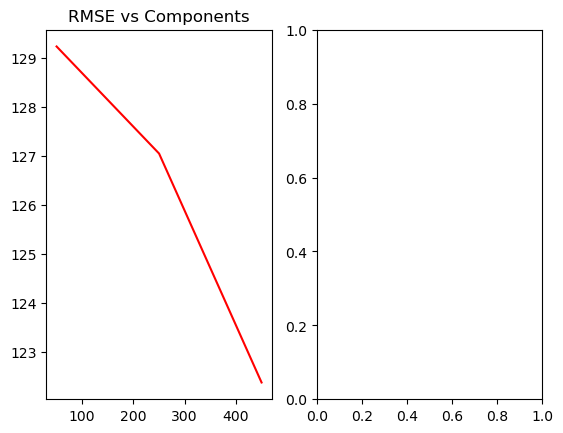

In [10]:
# gmmm with standard scaler with new formula for center values
raw_data = house_data = pd.read_csv('nyc_2019_data.csv', low_memory=False)

raw_data = raw_data[['availability_365', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'minimum_nights', 'number_of_reviews']]
neighbourhood = pd.get_dummies(raw_data[['neighbourhood_group', 'neighbourhood', 'room_type']])
raw_data = raw_data.drop(columns=['neighbourhood_group', 'neighbourhood', 'room_type'])
raw_data = pd.concat([raw_data, neighbourhood],axis=1)

data_train, data_test = train_test_split(raw_data, test_size=0.2, random_state=4)

sc = StandardScaler()

data_train_x = data_train.to_numpy()[:, 1:]
data_train_x = sc.fit_transform(data_train_x)
data_train_y = data_train.to_numpy()[:, 0]
data_test_x = data_test.to_numpy()[:, 1:]
data_test_x = sc.transform(data_test_x)
data_test_y = data_test.to_numpy()[:, 0]

mse_list = []
num_c_list = []
for num_c in range(50, 500, 200):
    gmm = GaussianMixture(n_components = num_c, random_state=4)
    gmm.fit(data_train_x)
    availability_per_comp = np.zeros(num_c)
    prob_train = gmm.predict_proba(data_train_x)
    pred_train = np.argmax(prob_train, axis=1)
    for i in range(0, num_c):
        availability_per_comp[i] = (np.sum((prob_train[:, i] * data_train_y)) / np.sum(prob_train[:, i]))
    availability_per_comp = availability_per_comp.reshape((1, -1))
    pred_comp = gmm.predict_proba(data_test_x)
    pred_availability = np.sum(availability_per_comp * pred_comp, axis=1)
    # print("error in availability " + str(num_c) + " clusters")
    error = np.sqrt((np.sum(np.square((pred_availability - data_test_y))) / data_test_x.shape[0]))

    mse_list.append(error)
    num_c_list.append(num_c)
    print(num_c)
    print(str(error))

figure, axis = plt.subplots(1, 2)
axis[0].plot(num_c_list, mse_list, color='red')
axis[0].set_title('RMSE vs Components')

600
120.47780519569696
800
119.07521358748906


Text(0.5, 1.0, 'RMSE vs Components')

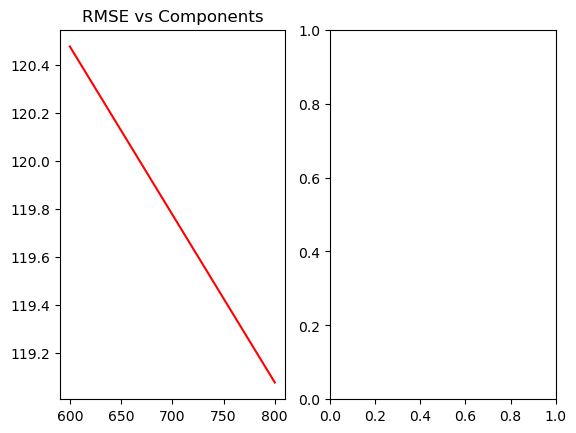

In [11]:
# (with more comps) : gmmm with standard scaler with new formula for center values
raw_data = house_data = pd.read_csv('nyc_2019_data.csv', low_memory=False)

raw_data = raw_data[['availability_365', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'minimum_nights', 'number_of_reviews']]
neighbourhood = pd.get_dummies(raw_data[['neighbourhood_group', 'neighbourhood', 'room_type']])
raw_data = raw_data.drop(columns=['neighbourhood_group', 'neighbourhood', 'room_type'])
raw_data = pd.concat([raw_data, neighbourhood],axis=1)

data_train, data_test = train_test_split(raw_data, test_size=0.2, random_state=4)

sc = StandardScaler()

data_train_x = data_train.to_numpy()[:, 1:]
data_train_x = sc.fit_transform(data_train_x)
data_train_y = data_train.to_numpy()[:, 0]
data_test_x = data_test.to_numpy()[:, 1:]
data_test_x = sc.transform(data_test_x)
data_test_y = data_test.to_numpy()[:, 0]

mse_list = []
num_c_list = []
for num_c in range(600, 801, 200):
    gmm = GaussianMixture(n_components = num_c, random_state=4)
    gmm.fit(data_train_x)
    availability_per_comp = np.zeros(num_c)
    prob_train = gmm.predict_proba(data_train_x)
    pred_train = np.argmax(prob_train, axis=1)
    for i in range(0, num_c):
        availability_per_comp[i] = (np.sum((prob_train[:, i] * data_train_y)) / np.sum(prob_train[:, i]))
    availability_per_comp = availability_per_comp.reshape((1, -1))
    pred_comp = gmm.predict_proba(data_test_x)
    pred_availability = np.sum(availability_per_comp * pred_comp, axis=1)
    # print("error in availability " + str(num_c) + " clusters")
    error = np.sqrt((np.sum(np.square((pred_availability - data_test_y))) / data_test_x.shape[0]))

    mse_list.append(error)
    num_c_list.append(num_c)
    print(num_c)
    print(str(error))

figure, axis = plt.subplots(1, 2)
axis[0].plot(num_c_list, mse_list, color='red')
axis[0].set_title('RMSE vs Components')